In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
mises = pd.read_csv('mises.csv').values
peeq = pd.read_csv('peeq.csv').values
triax = pd.read_csv('triax.csv').values
lode = pd.read_csv('lode.csv').values
volume = pd.read_csv('volume.csv').values

Wall time: 11.7 s


**Calculate global variables**

In [3]:
globalvolume = volume.sum(axis=1)
globalTriax = np.sum(triax * volume, axis=1)/globalvolume
globalLode = np.sum(lode * volume, axis=1)/globalvolume
globalPeeq = np.sum(peeq * volume, axis=1)/globalvolume

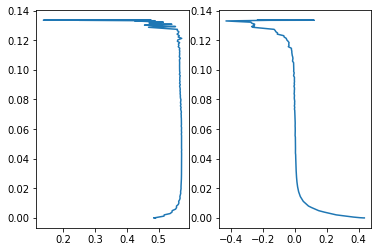

In [4]:
plt.subplot(1,2,1)
plt.plot(globalTriax, globalPeeq)
plt.subplot(1,2,2)
plt.plot(globalLode, globalPeeq)
plt.show()

In [5]:
globalVar = np.c_[globalTriax, globalPeeq]
np.savetxt('globalVar.csv', globalVar, delimiter=',')

**Calculate local variables**

In [6]:
localElems = np.loadtxt('localElems.csv').tolist()
localElems = [int(e) for e in localElems]

In [7]:
localvolume = volume[:, localElems].sum(axis=1)
localTriax = np.sum(triax[:, localElems] * volume[:, localElems], axis=1)/localvolume
localLode = np.sum(lode[:, localElems] * volume[:, localElems], axis=1)/localvolume
localPeeq = np.sum(peeq[:, localElems] * volume[:, localElems], axis=1)/localvolume

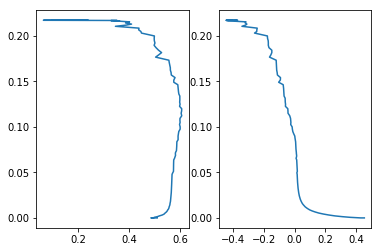

In [8]:
plt.subplot(1,2,1)
plt.plot(localTriax, localPeeq)
plt.subplot(1,2,2)
plt.plot(localLode, localPeeq)
plt.show()

In [9]:
localVar = np.c_[localTriax, localPeeq]
np.savetxt('localVar.csv', localVar, delimiter=',')